# Trackfile original

## Configuracion

In [2]:
import kdsource.histograms as kdh
import kdsource.surfsource as kds
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from typing import Sequence, Tuple, List, Union

plt.rcParams['figure.figsize'] = (15, 2.5)

def plot_pairwise_matrix(
    surface_source,
    vars_list: List[str],
    bins: Union[int, List[int]] = 100,
    *,
    xscale: str = "linear",
    yscale: str = "log",
    zscale: str = "log",
    figsize: Tuple[int, int] | None = None,
) -> Tuple[plt.Figure, List[List[plt.Axes]]]:
    """Draw an *n×n* matrix of distributions for every pair of variables.

    The matrix contains

    * **Diagonal** – 1-D histograms of each variable  
      (`plot_distribution(vars=[v], …)`).

    * **Off-diagonals** – 2-D colour-map histograms for every
      ordered pair *(vᵢ, vⱼ)*  
      (`plot_distribution(vars=[vᵢ, vⱼ], …, zscale='log')`).

    Parameters
    ----------
    surface_source
        Instance of ``kdsource.SurfaceSourceFile`` that already has the
        particles loaded.
    vars_list : list[str]
        Ordered list of variables to plot, e.g.
        ``["ln(E0/E)", "x", "y", "mu", "phi"]``.
    bins : int | list[int], default **100**
        Bin count (scalar) or per-variable list passed straight to
        ``plot_distribution``.
    xscale : {'linear', 'log'}, default **'linear'**
        Scale used for every *x-axis* in the matrix.
    yscale : {'linear', 'log'}, default **'log'**
        Scale used for every *y-axis* (and 1-D histogram counts).
    zscale : {'linear', 'log'}, default **'log'**
        Colour-bar scale for all 2-D plots.
    figsize : tuple[int, int] | None
        Figure size in inches.  Defaults to *(4 × n, 4 × n)*.

    Returns
    -------
    fig, axes
        The created ``matplotlib`` figure and its *n×n* axes matrix.

    Notes
    -----
    *Internally* uses ``plt.sca(ax)`` before calling
    ``surface_source.plot_distribution(..)`` so that the plot is drawn
    in the proper cell (``plot_distribution`` always acts on the current
    axis) :contentReference[oaicite:0]{index=0}:contentReference[oaicite:1]{index=1}.

    All 2-D plots receive ``zscale=log`` as requested :contentReference[oaicite:2]{index=2}:contentReference[oaicite:3]{index=3}.
    """
    n = len(vars_list)
    if figsize is None:
        figsize = (4 * n, 4 * n)

    fig, axes = plt.subplots(n, n, figsize=figsize, squeeze=False)

    # Ensure ``bins`` is a list the same length as ``vars_list``.
    if isinstance(bins, int):
        bins = [bins] * len(vars_list)

    for i, var_i in enumerate(vars_list):
        for j, var_j in enumerate(vars_list):
            ax = axes[i][j]
            plt.sca(ax)  # make this axes current

            if i == j:
                # Diagonal: 1-D histogram
                surface_source.plot_distribution(
                    vars=[var_i],
                    bins=[bins[i]],
                    scales=[xscale, yscale],
                )
            else:
                # Off-diagonal: 2-D histogram
                surface_source.plot_distribution(
                    vars=[var_j, var_i],                # x = var_j, y = var_i
                    bins=[bins[j], bins[i]],
                    scales=[xscale, xscale],
                    zscale=zscale,
                )

            # Cosmetic tweaks: remove redundant tick labels
            if i < n - 1:
                ax.set_xlabel("")
            if j > 0:
                ax.set_ylabel("")
            if i != j:
                ax.set_title("")  # avoid clutter

    plt.tight_layout()
    return fig, axes

hs = kdh.HistogramSource(
    trackfile="/home/lucas/Documents/Proyecto_Integrador/PI/resampleo_trackfiles/trackfile1/surface_source.h5",
    particle_type="neutron",
    z0=0,
    Nparticles=1e10,
    # surface_geometry='circular',
    # R=5,
    domain={"w": [0, 2]},
)

df = hs.surface_source.get_pandas_dataframe()
df["extra"] = np.cos(df["phi"])
df["extra_theta"] = np.cos(df["theta"])
df["extra_psi"] = np.cos(df["psi"])


hs.configure_binning(
    variable_order=["ln(E0/E)", "x", "y", "mu", "phi"],
    micro_bins=[80] * 5,
    macro_bins=[8, 7, 6, 5],
    micro_binning="adaptive",
    macro_binning="adaptive",
)

hs.build_tree()

hs.write_xml(output="source.xml")

hs.generate_mcpl(
    n_particles=1e7,
    write_path="trackfile1.mcpl",
    overwrite=True,
)


[DEBUG] Creando SurfaceSourceFile con domain={'w': [0, 2], 'type': [2112, None]}


Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/resampleo_trackfiles/trackfile1/surface_source.h5: 454961
100% n, 0% g, 0% e-, 0% e+, 0% p, 


[DEBUG] Σwgt=4.248e+05 | N=10000000000 | J=4.248e-05
[DEBUG] Binning configurado → {'order': ['ln(E0/E)', 'x', 'y', 'mu', 'phi'], 'micro': [80, 80, 80, 80, 80], 'macro': [8, 7, 6, 5], 'micro_binning': 'adaptive', 'macro_binning': 'adaptive', 'user': [None, None, None, None, None]}
[DEBUG] Árbol construido con éxito. Root=TreeNode(n_children=8)
[INFO] XML guardado → source.xml
[INFO] Ejecutando: kdtool resample -o /home/lucas/Documents/Proyecto_Integrador/PI/resampleo_trackfiles/trackfile1/config1/trackfile1.mcpl -n 10000000 -m 2 /home/lucas/Documents/Proyecto_Integrador/PI/resampleo_trackfiles/trackfile1/config1/source.xml


KDSource resample tool
flag1
Resampling from histograms...
Header loaded successfully
Variables = 5 | z0 = 0.000 cm | J = 4.248e-05 1/s
 | Geometry = rectangular
Particula 100000
Particula 200000
Particula 300000
Particula 400000
Particula 500000
Particula 600000
Particula 700000
Particula 800000
Particula 900000
Particula 1000000
Particula 1100000
Particula 1200000
Particula 1300000
Particula 1400000
Particula 1500000
Particula 1600000
Particula 1700000
Particula 1800000
Particula 1900000
Particula 2000000
Particula 2100000
Particula 2200000
Particula 2300000
Particula 2400000
Particula 2500000
Particula 2600000
Particula 2700000
Particula 2800000
Particula 2900000
Particula 3000000
Particula 3100000
Particula 3200000
Particula 3300000
Particula 3400000
Particula 3500000
Particula 3600000
Particula 3700000
Particula 3800000
Particula 3900000
Particula 4000000
Particula 4100000
Particula 4200000
Particula 4300000
Particula 4400000
Particula 4500000
Particula 4600000
Particula 4700000
P

[INFO] MCPL generado → /home/lucas/Documents/Proyecto_Integrador/PI/resampleo_trackfiles/trackfile1/config1/trackfile1.mcpl


MCPL: Succesfully compressed file into trackfile1.mcpl.gz
Successfully sampled 10000000 particles.


PosixPath('/home/lucas/Documents/Proyecto_Integrador/PI/resampleo_trackfiles/trackfile1/config1/trackfile1.mcpl')

## Ploteos de la distribucion original

### Ploteos 1D

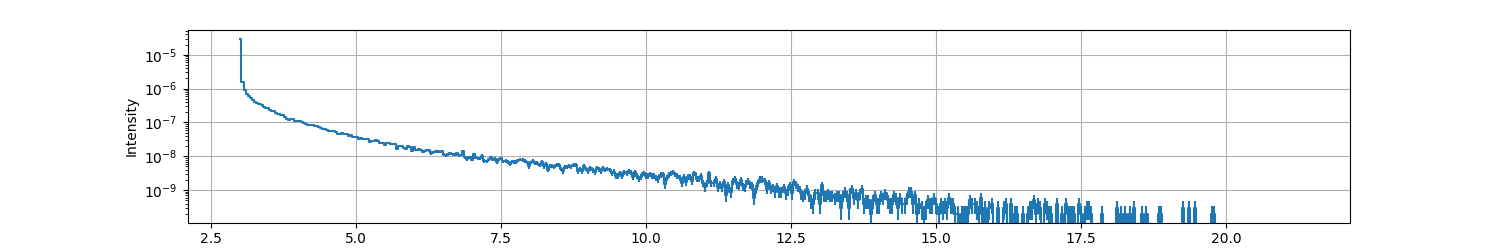

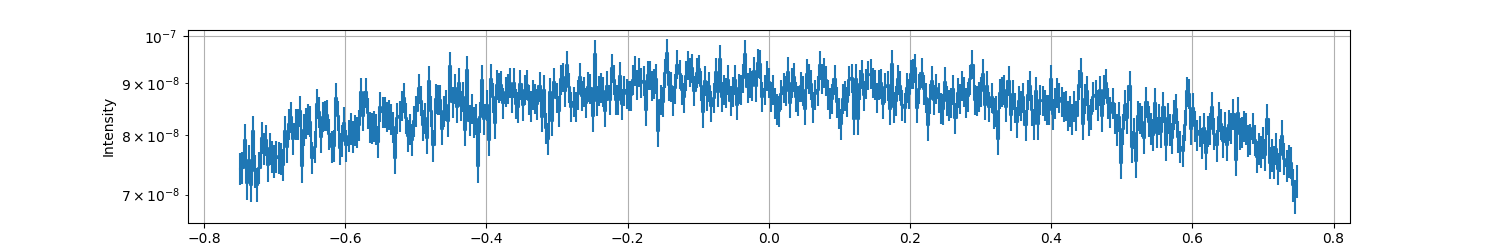

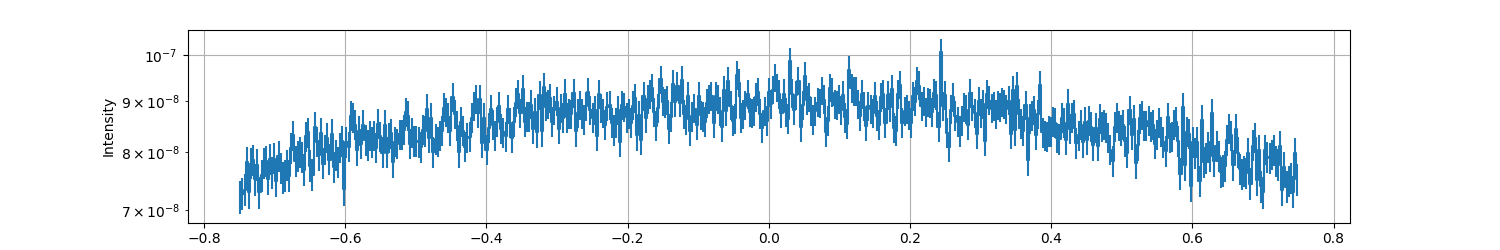

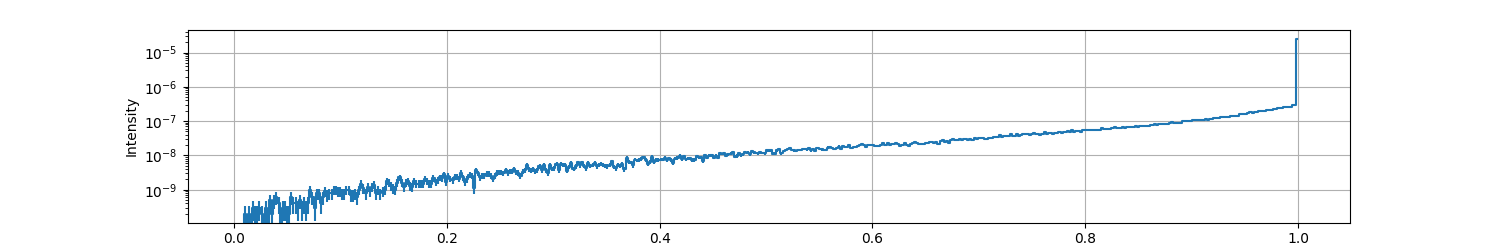

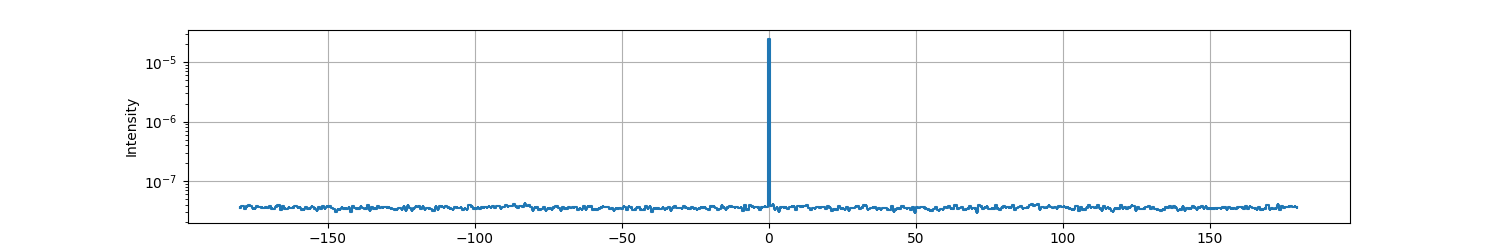

In [4]:
bins = 500
%matplotlib widget
plt.figure()
hs.surface_source.plot_distribution(
    vars=["ln(E0/E)"],
    bins=[bins],
    scales=["linear", "log"],
)
plt.grid()
plt.show()

plt.figure()
hs.surface_source.plot_distribution(
    vars=["x"],
    bins=[bins],
    scales=["linear", "log"],
)
plt.grid()
plt.show()

plt.figure()
hs.surface_source.plot_distribution(
    vars=["y"],
    bins=[bins],
    scales=["linear", "log"],
)
plt.grid()
plt.show()

plt.figure()
hs.surface_source.plot_distribution(
    vars=["mu"],
    bins=[bins],
    scales=["linear", "log"],
)
plt.grid()
plt.show()

plt.figure()
hs.surface_source.plot_distribution(
    vars=["phi"],
    bins=[bins],
    scales=["linear", "log"],
)
plt.grid()
plt.show()

### Ploteos 2D

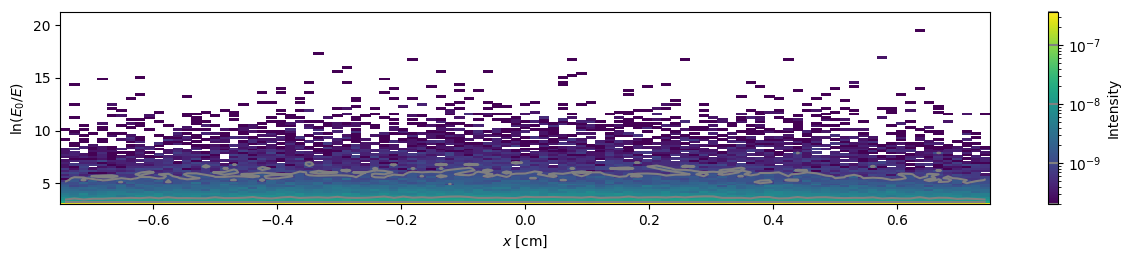

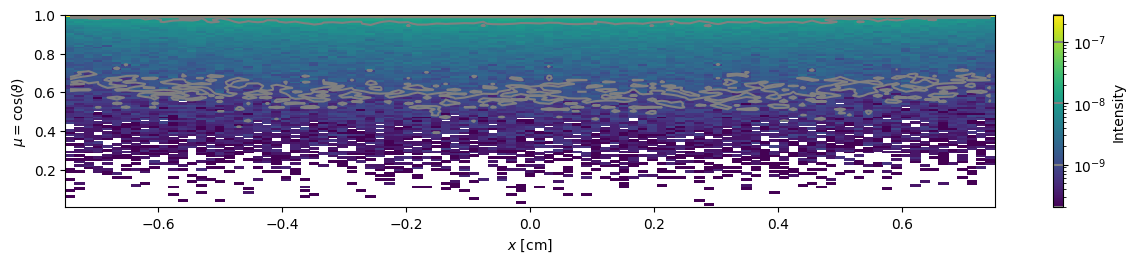

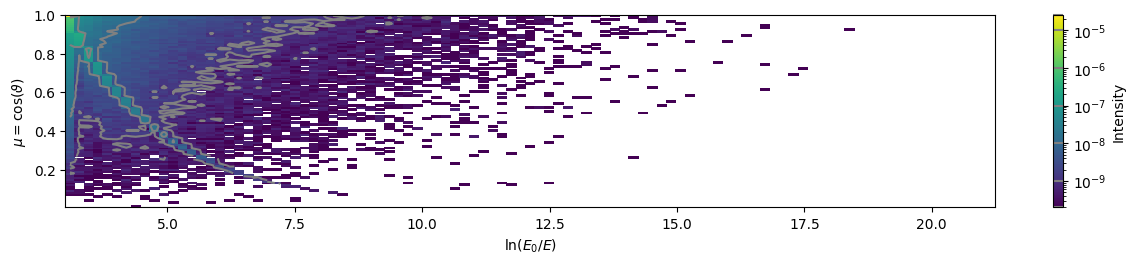

In [3]:
# %matplotlib widget
plt.figure()
hs.surface_source.plot_distribution(
    vars=["x", "ln(E0/E)"],
    bins=[bins, bins],
    scales=["linear", "linear"],
    zscale="log",
)
plt.show()

plt.figure()
hs.surface_source.plot_distribution(
    vars=["x", "mu"],
    bins=[bins, bins],
    scales=["linear", "linear"],
    zscale="log",
)
plt.show()

plt.figure()
hs.surface_source.plot_distribution(
    vars=["ln(E0/E)", "mu"],
    bins=[bins, bins],
    scales=["linear", "linear"],
    zscale="log",
)
plt.show()

### Ploteo nxn

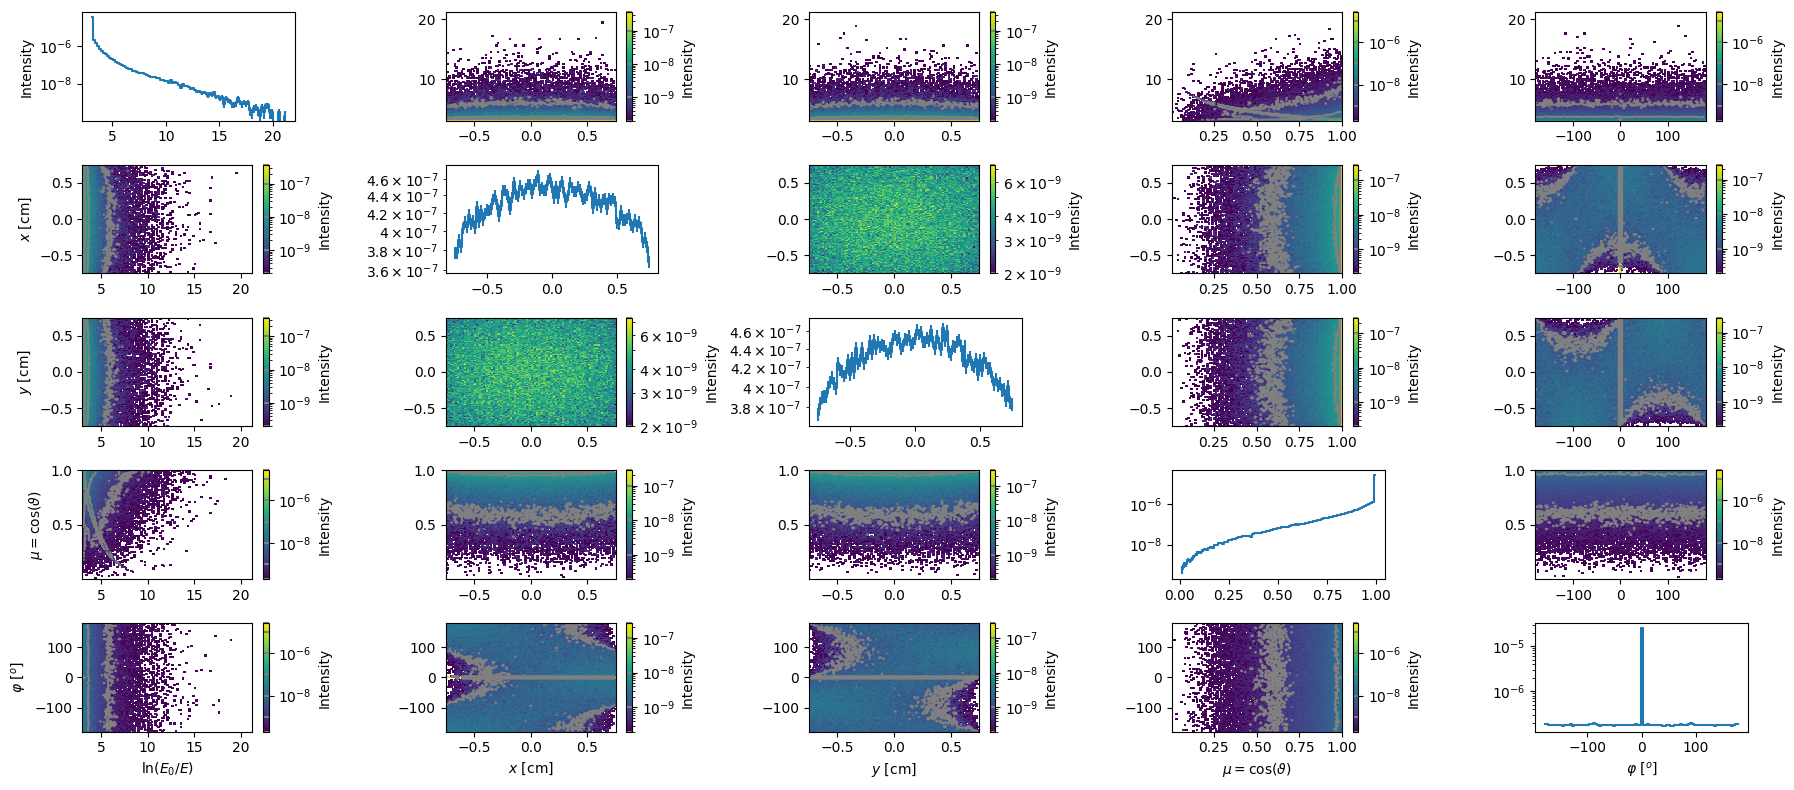

In [4]:
# %matplotlib widget
vars_to_plot = ["ln(E0/E)", "x", "y", "mu", "phi"]
fig, ax_matrix = plot_pairwise_matrix(
    hs.surface_source, vars_to_plot, bins=100,figsize=(18, 8)
)
plt.show()


# Trackfile resampleado

## Ploteo de la distribucion sampleada

Number of particles in file trackfile1.mcpl.gz: 10000000
100% n, 0% g, 0% e-, 0% e+, 0% p, 


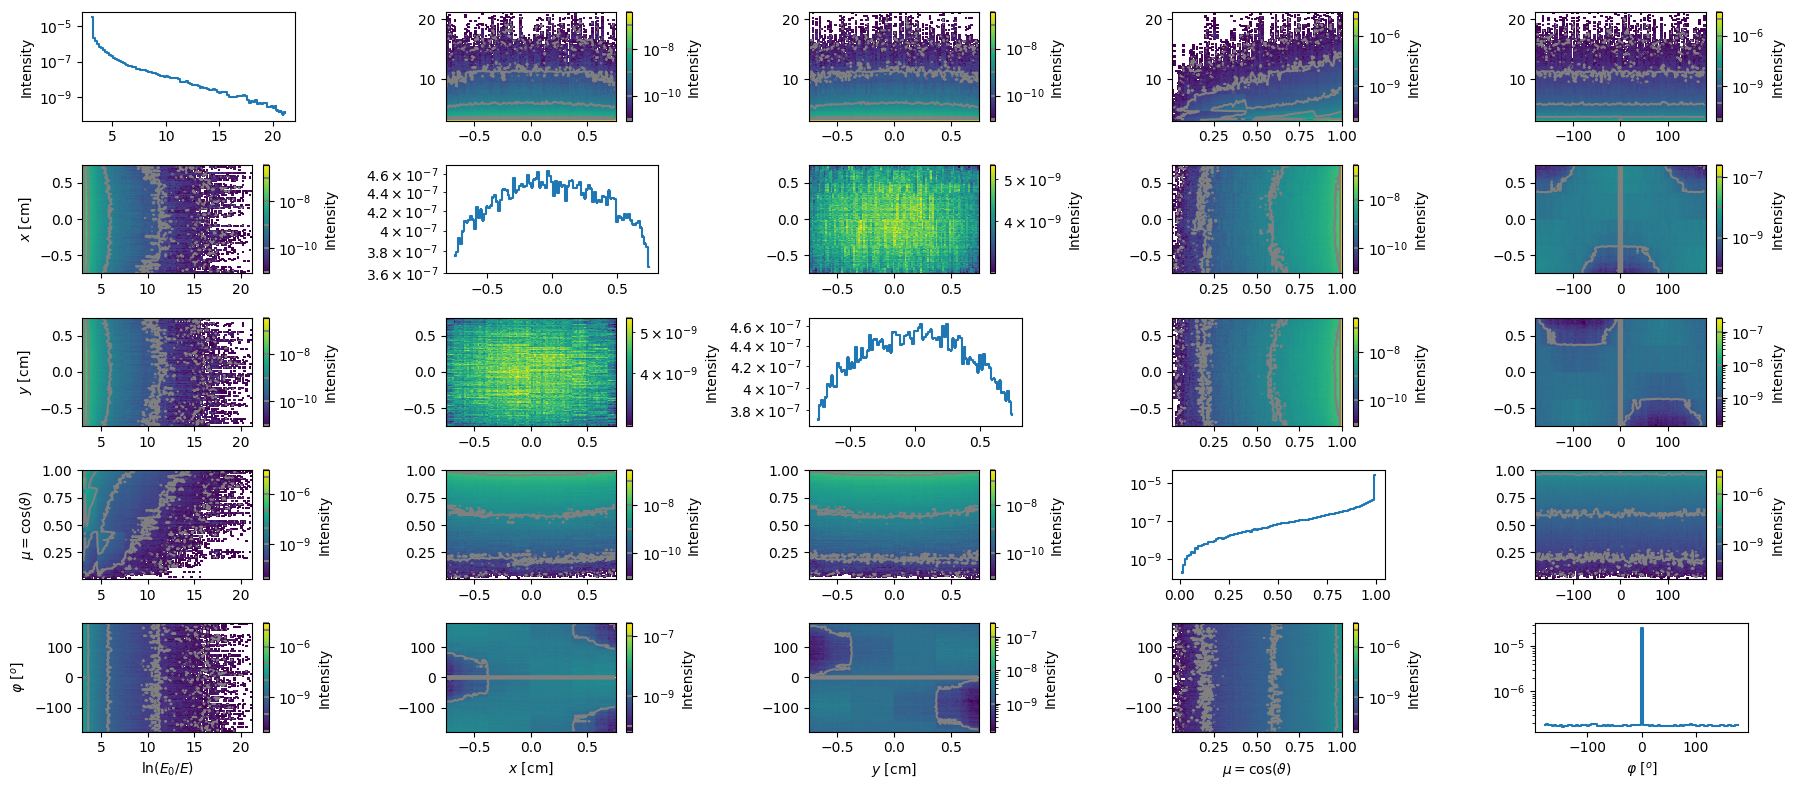

In [5]:
trackfile_resampled = kds.SurfaceSourceFile(
    filepath="trackfile1.mcpl.gz",
)
trackfile_resampled._Np = hs.surface_source._Np * trackfile_resampled._df2["wgt"].sum() / hs.surface_source._df2["wgt"].sum()
fig, ax_matrix = plot_pairwise_matrix(
    trackfile_resampled, vars_to_plot, bins=100,figsize=(18, 8)
)
plt.show()

## Comparacion entre files

### Ploteos 1D

4.24773e-05
4.24773e-05
424773.0
10000000.0
10000000000
235419859548.51178
1.0
1.0


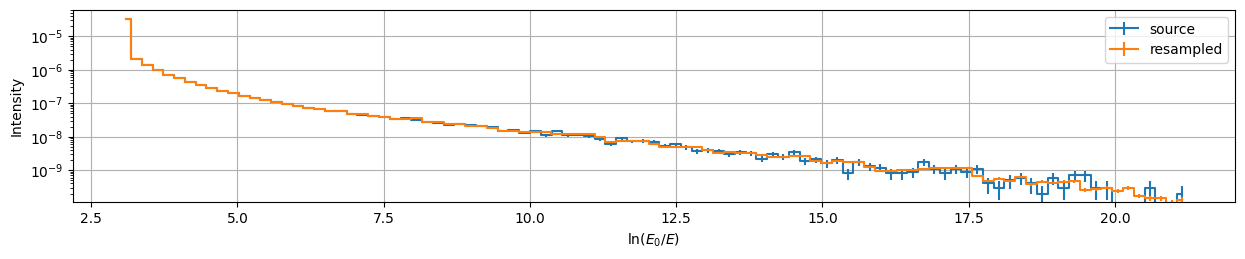

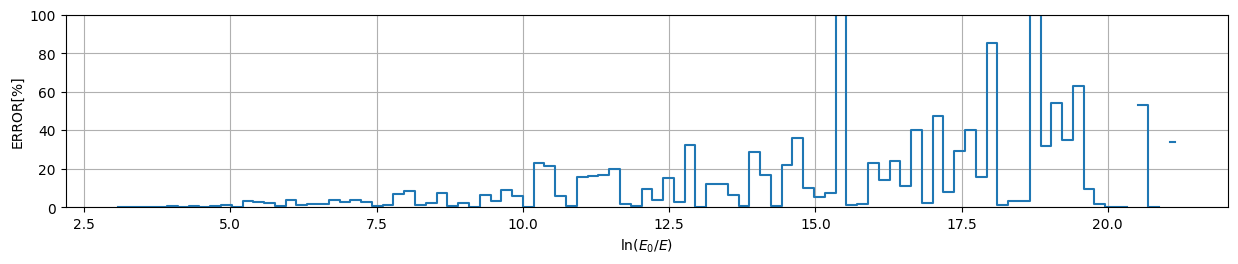

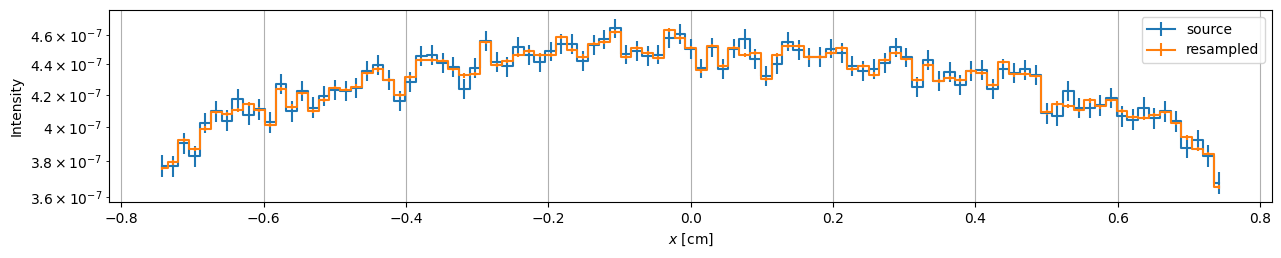

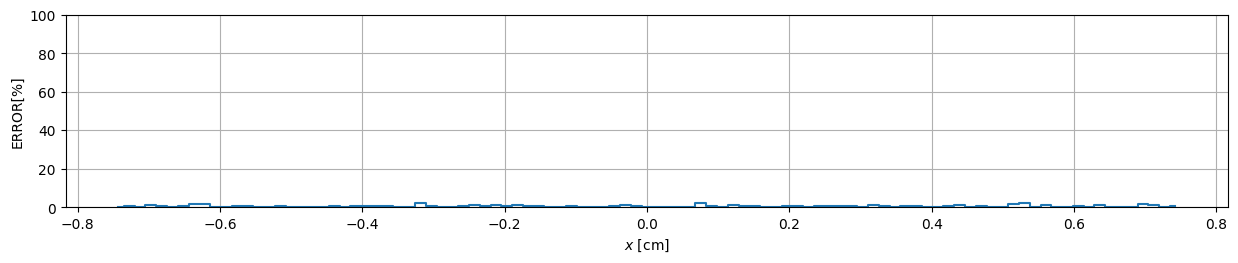

In [6]:
bins = 100
# %matplotlib widget

print(hs.surface_source._df2["wgt"].sum()/hs.surface_source._Np)
print(trackfile_resampled._df2["wgt"].sum()/trackfile_resampled._Np)
print(hs.surface_source._df2["wgt"].sum())
print(trackfile_resampled._df2["wgt"].sum())
print(hs.surface_source._Np)
print(trackfile_resampled._Np)
print(hs.surface_source._S0)
print(trackfile_resampled._S0)


plt.figure()
hs.surface_source.plot_distribution(
    vars=["ln(E0/E)"],
    bins=[bins],
    scales=["linear", "log"],
    label="source",
)

trackfile_resampled.plot_distribution(
    vars=["ln(E0/E)"],
    bins=[bins],
    scales=["linear", "log"],
    label="resampled",
)
plt.grid()
plt.legend()
plt.show()
plt.figure()
hs.surface_source.plot_distribution(
    vars=["ln(E0/E)"],
    bins=[bins],
    scales=["linear", "linear"],
    plot_difference=True,
    Difference_to=trackfile_resampled,
)
plt.grid()
plt.ylim(0, 100)
plt.show()

plt.figure()
hs.surface_source.plot_distribution(
    vars=["x"],
    bins=[bins],
    scales=["linear", "log"],
    label="source",
)

trackfile_resampled.plot_distribution(
    vars=["x"],
    bins=[bins],
    scales=["linear", "log"],
    label="resampled",
    # factor=7.15/7.7,
)
plt.grid()
plt.legend()
plt.show()
plt.figure()
hs.surface_source.plot_distribution(
    vars=["x"],
    bins=[bins],
    scales=["linear", "linear"],
    plot_difference=True,
    Difference_to=trackfile_resampled,
)
plt.grid()
plt.ylim(0, 100)
plt.show()

### Ploteos 2D

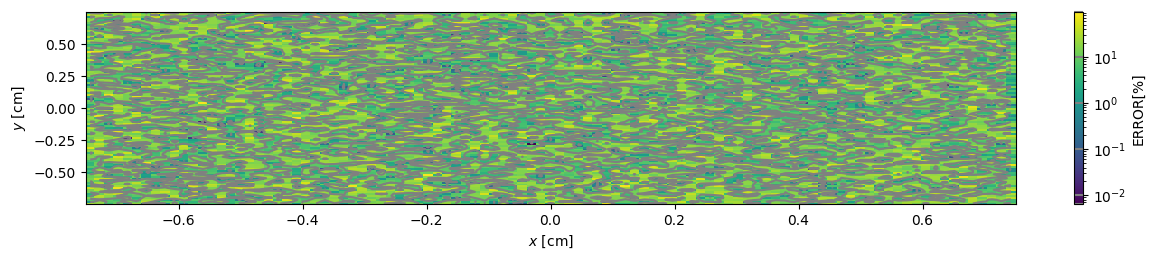

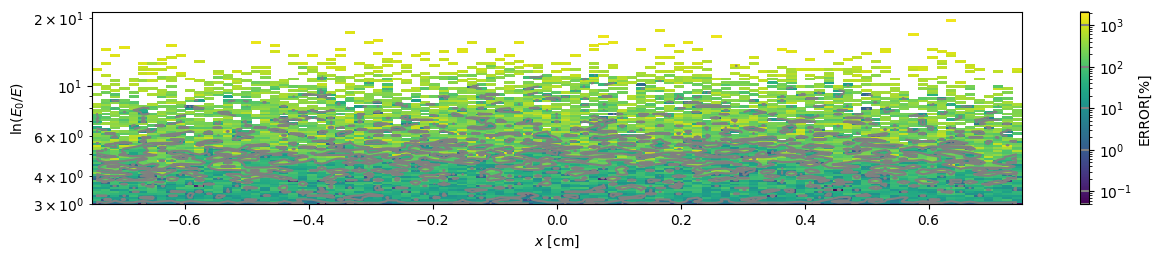

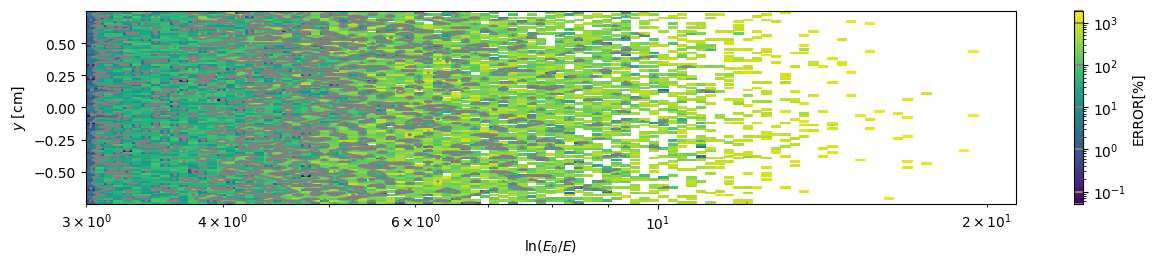

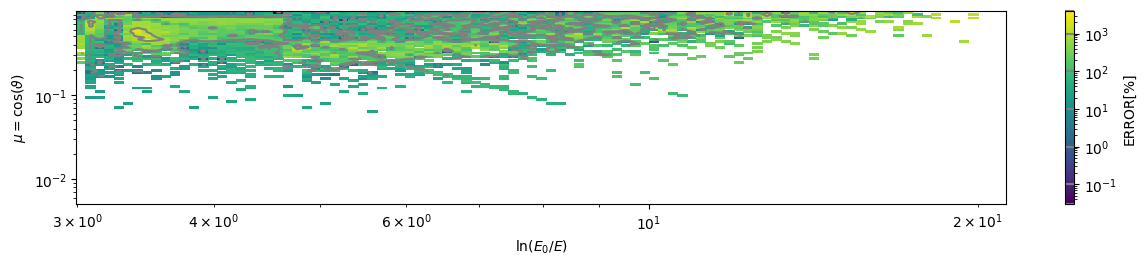

In [7]:
# %matplotlib widget
# plt.figure()
# hs.surface_source.plot_distribution(
#     vars=["x", "y"],
#     bins=[bins, bins],
#     scales=["linear", "linear"],
#     zscale="log",
# )
# plt.show()

# plt.figure()
# trackfile_resampled.plot_distribution(
#     vars=["x", "y"],
#     bins=[bins, bins],
#     scales=["linear", "linear"],
#     zscale="log",
# )
# plt.show()

def plot_comparation_2d(
    source,
    resampled,
    vars: List[str],
    bins: int,
    scales: List[str] = ["linear", "linear"],
):
    
    plt.figure()
    source.plot_distribution(
        vars=vars,
        bins=[bins, bins],
        scales=scales,
        zscale="log",
        plot_difference=True,
        Difference_to=resampled,
    )
    plt.show()

plot_comparation_2d(
    hs.surface_source,
    trackfile_resampled,
    vars=["x", "y"],
    bins=bins,
)

plot_comparation_2d(
    hs.surface_source,
    trackfile_resampled,
    vars=["x", "ln(E0/E)"],
    scales=["linear", "log"],
    bins=bins,
)
plot_comparation_2d(
    hs.surface_source,
    trackfile_resampled,
    vars=["ln(E0/E)", "y"],
    scales=["log", "linear"],
    bins=bins,
)
plot_comparation_2d(
    hs.surface_source,
    trackfile_resampled,
    scales=["log", "log"],
    vars=["ln(E0/E)", "mu"],
    bins=bins,
)

### Divergencia KL

In [10]:
import numpy as np
from itertools import combinations
from typing import Iterable, Mapping

# ----------------------------------------------------------------------------- 
# Helper genérico: KL sobre vectores de conteos (pseudoconteo incluido)
# -----------------------------------------------------------------------------
def _kl_counts(counts_p, counts_q, smooth: float = 0.5) -> float:
    p = counts_p.astype(float) + smooth
    q = counts_q.astype(float) + smooth
    p /= p.sum()
    q /= q.sum()
    return float(np.sum(p * np.log(p / q)))


# ----------------------------------------------------------------------------- 
# Función principal
# -----------------------------------------------------------------------------
def report_kl_divergence(
    ss_original,
    ss_resampled,
    variables: Iterable[str],
    *,
    n_bins: int = 1_000,
    smooth: float = 0.5,
    quiet: bool = False,
) -> Mapping[str, Mapping]:
    """KL 1-D y 2-D (todas las parejas) entre dos SurfaceSourceFile.

    Returns
    -------
    result : dict
        {
          "kl_1d":   {var: kl, ...},
          "kl_2d":   {"var1,var2": kl, ...},
          "total_1d": float,
          "total_2d": float,
          "total_all": float
        }
    """
    df_p = ss_original.get_pandas_dataframe()
    df_q = ss_resampled.get_pandas_dataframe()

    vars_list = list(variables)
    kl_1d, kl_2d = {}, {}
    total_1d = total_2d = 0.0

    # ---------- 1-D ----------------------------------------------------------
    for var in vars_list:
        if var not in df_p.columns or var not in df_q.columns:
            raise KeyError(f"Variable '{var}' no existe en ambos DataFrames")

        vmin = min(df_p[var].min(), df_q[var].min())
        vmax = max(df_p[var].max(), df_q[var].max())
        bins = np.linspace(vmin, vmax, n_bins + 1)

        cnt_p, _ = np.histogram(df_p[var], bins=bins)
        cnt_q, _ = np.histogram(df_q[var], bins=bins)

        kl = _kl_counts(cnt_p, cnt_q, smooth)
        kl_1d[var] = kl
        total_1d += kl

        if not quiet:
            print(f"KL 1D[{var}] = {kl:.4e} nats")

    # ---------- 2-D (todas las parejas) -------------------------------------
    for var_x, var_y in combinations(vars_list, 2):
        # rangos independientes por eje
        vx_min = min(df_p[var_x].min(), df_q[var_x].min())
        vx_max = max(df_p[var_x].max(), df_q[var_x].max())
        vy_min = min(df_p[var_y].min(), df_q[var_y].min())
        vy_max = max(df_p[var_y].max(), df_q[var_y].max())

        x_bins = np.linspace(vx_min, vx_max, n_bins + 1)
        y_bins = np.linspace(vy_min, vy_max, n_bins + 1)

        H_p, _, _ = np.histogram2d(df_p[var_x], df_p[var_y],
                                   bins=[x_bins, y_bins])
        H_q, _, _ = np.histogram2d(df_q[var_x], df_q[var_y],
                                   bins=[x_bins, y_bins])

        kl = _kl_counts(H_p.ravel(), H_q.ravel(), smooth)
        key = f"{var_x},{var_y}"
        kl_2d[key] = kl
        total_2d += kl

        if not quiet:
            print(f"KL 2D[{key}] = {kl:.4e} nats")

    total_all = total_1d + total_2d
    if not quiet:
        print("-" * 50)
        print(f"Σ KL 1-D = {total_1d:.4e}  |  Σ KL 2-D = {total_2d:.4e}")
        print(f"KL total  = {total_all:.4e} nats (1D + 2D)")

    return {
        "kl_1d": kl_1d,
        "kl_2d": kl_2d,
        "total_1d": total_1d,
        "total_2d": total_2d,
        "total_all": total_all,
    }


In [12]:
# ss_orig y ss_resp son tus SurfaceSourceFile previamente cargados
kl_results = report_kl_divergence(
    hs.surface_source, trackfile_resampled,
    variables=["ln(E0/E)","x", "y", "mu", "phi"],
    n_bins=1000,
    smooth=1e-9,
)


KL 1D[ln(E0/E)] = 1.8257e-01 nats
KL 1D[x] = 9.6362e-04 nats
KL 1D[y] = 9.7414e-04 nats
KL 1D[mu] = 1.1831e-03 nats
KL 1D[phi] = 4.6672e-01 nats
KL 2D[ln(E0/E),x] = 6.5705e-01 nats
KL 2D[ln(E0/E),y] = 6.6357e-01 nats
KL 2D[ln(E0/E),mu] = 1.0437e+00 nats
KL 2D[ln(E0/E),phi] = 1.1789e+00 nats
KL 2D[x,y] = 1.1795e+00 nats
KL 2D[x,mu] = 8.6367e-01 nats
KL 2D[x,phi] = 1.4531e+00 nats
KL 2D[y,mu] = 8.6089e-01 nats
KL 2D[y,phi] = 1.4639e+00 nats
KL 2D[mu,phi] = 1.3200e+00 nats
--------------------------------------------------
Σ KL 1-D = 6.5241e-01  |  Σ KL 2-D = 1.0684e+01
KL total  = 1.1337e+01 nats (1D + 2D)
